In [3]:
import re # for regular expression
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk #for text manipulation
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

Baca Data training dan Data Testing

In [4]:
train = pd.read_csv('presiden_train1.csv')
test = pd.read_csv('presiden_test1.csv')

In [6]:
train.head(10)

,tweet
0,The President as theodore roosevelt is able to read fast he can read 1 page of the book in the time someone needs to read
1,"My message to the government is special, Mr. President, please help this student with a special request"
2,we have sent a letter to President Jokowi to fire as a member of BPIP for stating that he is always y
3,look at the explanation in ilc I understand why it is considered governor brain Ahok governor Mulu
4,look at the explanation in ilc I understand why it is considered governor brain Ahok governor Mulu
5,supports the umno's supernatural stance
6,"Dear bp President Ri Do A, we have accompanied the success of the renovation assistance team"
7,look at the explanation in ilc I understand why it is considered governor brain Ahok governor Mulu
8,look at the explanation in ilc I understand why it is considered governor brain Ahok governor Mulu
9,the rich is like a governor who is like this


In [7]:
from textblob import TextBlob
train['polarity'] = train.apply(lambda x: TextBlob(x['tweet']).sentiment.polarity, axis=1)
train['subjectivity'] = train.apply(lambda x:TextBlob(x['tweet']).sentiment.subjectivity, axis=1)
train.head()

,tweet,polarity,subjectivity
0,The President as theodore roosevelt is able to read fast he can read 1 page of the book in the time someone needs to read,0.350000,0.612500
1,"My message to the government is special, Mr. President, please help this student with a special request",0.357143,0.571429
2,we have sent a letter to President Jokowi to fire as a member of BPIP for stating that he is always y,0.000000,0.000000
3,look at the explanation in ilc I understand why it is considered governor brain Ahok governor Mulu,0.000000,0.000000
4,look at the explanation in ilc I understand why it is considered governor brain Ahok governor Mulu,0.000000,0.000000


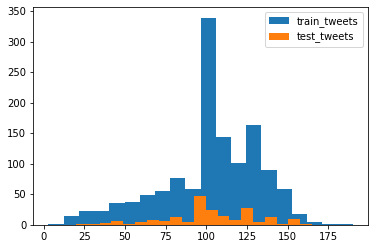

In [8]:
lenght_train = train['tweet'].str.len()
lenght_test = test['tweet'].str.len()

plt.hist(lenght_train, bins=20, label="train_tweets")
plt.hist(lenght_test, bins=20, label="test_tweets")
plt.legend()
plt.show()

In [9]:
combi = train.append(test, ignore_index=True)
combi.shape

C:\Users\ilham\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


(1491, 3)

Data Cleaning

In [10]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, "",input_txt)
        
    return input_txt

In [11]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")
combi.head()

,polarity,subjectivity,tweet,tidy_tweet
0,0.350000,0.612500,The President as theodore roosevelt is able to read fast he can read 1 page of the book in the time someone needs to read,The President as theodore roosevelt is able to read fast he can read 1 page of the book in the time someone needs to read
1,0.357143,0.571429,"My message to the government is special, Mr. President, please help this student with a special request","My message to the government is special, Mr. President, please help this student with a special request"
2,0.000000,0.000000,we have sent a letter to President Jokowi to fire as a member of BPIP for stating that he is always y,we have sent a letter to President Jokowi to fire as a member of BPIP for stating that he is always y
3,0.000000,0.000000,look at the explanation in ilc I understand why it is considered governor brain Ahok governor Mulu,look at the explanation in ilc I understand why it is considered governor brain Ahok governor Mulu
4,0.000000,0.000000,look at the explanation in ilc I understand why it is considered governor brain Ahok governor Mulu,look at the explanation in ilc I understand why it is considered governor brain Ahok governor Mulu


In [12]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.lower().str.replace("[^a-zA-Z#]", " ")
combi.head(10)

,polarity,subjectivity,tweet,tidy_tweet
0,0.350000,0.612500,The President as theodore roosevelt is able to read fast he can read 1 page of the book in the time someone needs to read,the president as theodore roosevelt is able to read fast he can read page of the book in the time someone needs to read
1,0.357143,0.571429,"My message to the government is special, Mr. President, please help this student with a special request",my message to the government is special mr president please help this student with a special request
2,0.000000,0.000000,we have sent a letter to President Jokowi to fire as a member of BPIP for stating that he is always y,we have sent a letter to president jokowi to fire as a member of bpip for stating that he is always y
3,0.000000,0.000000,look at the explanation in ilc I understand why it is considered governor brain Ahok governor Mulu,look at the explanation in ilc i understand why it is considered governor brain ahok governor mulu
4,0.000000,0.000000,look at the explanation in ilc I understand why it is considered governor brain Ahok governor Mulu,look at the explanation in ilc i understand why it is considered governor brain ahok governor mulu
5,0.166667,0.566667,supports the umno's supernatural stance,supports the umno s supernatural stance
6,0.300000,0.000000,"Dear bp President Ri Do A, we have accompanied the success of the renovation assistance team",dear bp president ri do a we have accompanied the success of the renovation assistance team
7,0.000000,0.000000,look at the explanation in ilc I understand why it is considered governor brain Ahok governor Mulu,look at the explanation in ilc i understand why it is considered governor brain ahok governor mulu
8,0.000000,0.000000,look at the explanation in ilc I understand why it is considered governor brain Ahok governor Mulu,look at the explanation in ilc i understand why it is considered governor brain ahok governor mulu
9,0.375000,0.750000,the rich is like a governor who is like this,the rich is like a governor who is like this


In [13]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) #tokenizing

In [14]:
tokenized_tweet.head()

0    [the, president, as, theodore, roosevelt, is, able, to, read, fast, he, can, read, page, of, the, book, in, the, time, someone, needs, to, read]
1                              [my, message, to, the, government, is, special, mr, president, please, help, this, student, with, a, special, request]
2                        [we, have, sent, a, letter, to, president, jokowi, to, fire, as, a, member, of, bpip, for, stating, that, he, is, always, y]
3                                [look, at, the, explanation, in, ilc, i, understand, why, it, is, considered, governor, brain, ahok, governor, mulu]
4                                [look, at, the, explanation, in, ilc, i, understand, why, it, is, considered, governor, brain, ahok, governor, mulu]
Name: tidy_tweet, dtype: object

In [17]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 

In [20]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
combi['tidy_tweet'] = tokenized_tweet

Visualisasi

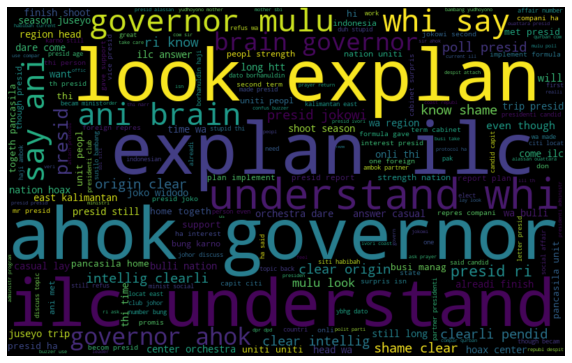

In [25]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Extract Feature

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [28]:
tfidf_vectorizer = TfidfVectorizer(max_df = 0.90, min_df = 2, max_features = 1000, stop_words = 'english')
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(1491, 1000)

In [29]:
bow_vectorizer = CountVectorizer(max_df = 0.90, min_df = 2, max_features = 1000, stop_words = 'english')
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(1491, 1000)

Klasifikasi

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [31]:
train_bow = bow[:1293,:]
test_bow = bow[1293:,:]
#spliting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['polarity'],
                                                         random_state=4,
                                                         test_size=0.2)
print("train set", xtrain_bow.shape, ytrain.shape)
print("test set", xvalid_bow.shape, yvalid.shape)

train set (1034, 1000) (1034,)
test set (259, 1000) (259,)


In [32]:
from sklearn.neighbors import KNeighborsClassifier